In [ ]:
def find_best_k(X_train, y_train, K_s, metric, K_fold):
    best_k = None
    best_accuracy = 0
    # Acha melhor k para uma lista de Ks
    for k in K_s:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, n_jobs=-1)
        # Usa Cross-Validation
        start_time = time.time()
        scores = cross_val_score(knn, X_train, y_train, cv=K_fold, scoring='accuracy')
        end_time = time.time()
        # Pega o K com melhor acuracia
        mean_accuracy = np.mean(scores)
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_k = k

        # imprime scores
        print(f"Scores ---- métrica: {metric} ---- valor de k: {k}")
        print(f"Tempo total de execução: {end_time - start_time:.2f} segundos")
        print(f"Acurácia em cada uma das 5 dobras: {scores}")
        print(f"Acurácia Média: {mean_accuracy:.4f}")
        print(f"Desvio Padrão: {np.std(scores):.4f}\n")
    return best_k, best_accuracy

In [ ]:
# Função para mostrar as imagens e as previsões
def plot_predictions(images, true_labels, pred_labels, num_images=15):
    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(3, 5, i + 1)
        # Remodelar o vetor para a imagem 28x28
        plt.imshow(images[i].reshape(28, 28), cmap='binary')

        # Define a cor do título: verde para acerto, vermelho para erro
        color = "green" if true_labels[i] == pred_labels[i] else "red"

        plt.title(f"Real: {true_labels[i]}\nPred: {pred_labels[i]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# fetch_openml busca o dataset pelo nome 'mnist_784'
# O as_frame=False garante que receberemos arrays NumPy
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff')

# X contém as imagens (vetores de 784 dimensões)
# y contém os rótulos (dígitos de 0 a 9)
X, y = mnist["data"], mnist["target"]

# Os rótulos vêm como strings, então convertemos para inteiros
y = y.astype(np.uint8)

print(f"Dataset carregado. Formato de X: {X.shape}, Formato de y: {y.shape}")

# Divisão padrão do MNIST: 60.000 para treino, 10.000 para teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10_000, random_state=42
)

# Normalização dos pixels para o intervalo [0, 1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Dataset carregado. Formato de X: (70000, 784), Formato de y: (70000,)


In [ ]:
# Vamos escolher o número de componentes que mantém 95% da variância
pca = PCA(n_components=0.95)

start_time = time.time()
# IMPORTANTE: O PCA é "aprendido" APENAS com os dados de TREINO
X_train_pca = pca.fit_transform(X_train)
end_time = time.time()

print(f"PCA treinado em {end_time - start_time:.2f} segundos.")
print(f"Número original de dimensões: {X_train.shape[1]}")
print(f"Número de dimensões após PCA: {pca.n_components_}")

# Agora, transformamos os conjuntos de validação e teste com o PCA já treinado
X_test_pca = pca.transform(X_test)

PCA treinado em 2.74 segundos.
Número original de dimensões: 784
Número de dimensões após PCA: 330


In [ ]:

# print("-------- kNN - Euclidiana - k=5 - k-folds=5 --------")
# Teste com Distância Euclidiana
# print("Métrica: Euclidiana")
# knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1) # n_jobs=-1 usa todos os cores do CPU
# start_time = time.time()
# scores = cross_val_score(knn_euclidean, X_train_full, y_train_full, cv=5, scoring='accuracy')
# end_time = time.time()
# print(f"\nTempo total de execução da validação cruzada: {end_time - start_time:.2f} segundos")
# print(f"Acurácia em cada uma das 5 dobras (folds): {scores}")
# print(f"\nAcurácia Média: {np.mean(scores):.4f}")
# print(f"Desvio Padrão da Acurácia: {np.std(scores):.4f}")

# define Ks
K_s = [1, 3, 5, 7, 9, 17]

best_k = 0
best_accuracy = 0
best_metric = 'euclidean'
#is_pca = False

# print("-------- kNN - Euclidiana - k-folds=5 --------")
# k, acc = find_best_k(X_train, y_train, K_s, 'euclidean', 5)
# print(f"Melhor valor de k: {k}")
# print(f"Melhor acurácia: {acc:.4f}")
# if acc > best_accuracy:
#     best_accuracy = acc
#     best_k = k
#     best_metric = 'euclidean'
#     is_pca = False

# print("-------- kNN - Manhattan - k-folds=5 --------")
# k, acc = find_best_k(X_train, y_train, K_s, 'manhattan', 5)
# print(f"Melhor valor de k: {k}")
# print(f"Melhor acurácia: {acc:.4f}")
# if acc > best_accuracy:
#     best_accuracy = acc
#     best_k = k
#     best_metric = 'manhattan'
#     is_pca = False

print("-------- kNN/PCA - Euclidiana - k-folds=5 --------")
k, acc = find_best_k(X_train_pca, y_train, K_s, 'euclidean', 5)
print(f"Melhor valor de k: {k}")
print(f"Melhor acurácia: {acc:.4f}")
if acc > best_accuracy:
    best_accuracy = acc
    best_k = k
    best_metric = 'euclidean'
    # is_pca = True

-------- kNN/PCA - Euclidiana - k-folds=5 --------
Scores ---- métrica: euclidean ---- valor de k: 1
Tempo total de execução: 80.07 segundos
Acurácia em cada uma das 5 dobras: [0.9485     0.94858333 0.95058333 0.95008333 0.94883333]
Acurácia Média: 0.9493
Desvio Padrão: 0.0009

Scores ---- métrica: euclidean ---- valor de k: 3
Tempo total de execução: 79.18 segundos
Acurácia em cada uma das 5 dobras: [0.9495     0.9475     0.95083333 0.94941667 0.94741667]
Acurácia Média: 0.9489
Desvio Padrão: 0.0013

Scores ---- métrica: euclidean ---- valor de k: 5
Tempo total de execução: 79.27 segundos
Acurácia em cada uma das 5 dobras: [0.94841667 0.94741667 0.94916667 0.94933333 0.94766667]
Acurácia Média: 0.9484
Desvio Padrão: 0.0008

Scores ---- métrica: euclidean ---- valor de k: 7
Tempo total de execução: 80.68 segundos
Acurácia em cada uma das 5 dobras: [0.9465     0.94575    0.94491667 0.94758333 0.9475    ]
Acurácia Média: 0.9464
Desvio Padrão: 0.0010

Scores ---- métrica: euclidean ---- v

In [ ]:
print("-------- kNN/PCA - Manhattan - k-folds=5 --------")
k, acc = find_best_k(X_train_pca, y_train, K_s, 'manhattan', 5)
print(f"Melhor valor de k: {k}")
print(f"Melhor acurácia: {acc:.4f}")
if acc > best_accuracy:
    best_accuracy = acc
    best_k = k
    best_metric = 'manhattan'
    # is_pca = True

-------- kNN/PCA - Manhattan - k-folds=5 --------
Scores ---- métrica: manhattan ---- valor de k: 1
Tempo total de execução: 1422.25 segundos
Acurácia em cada uma das 5 dobras: [0.934      0.93358333 0.93616667 0.93808333 0.93475   ]
Acurácia Média: 0.9353
Desvio Padrão: 0.0016

Scores ---- métrica: manhattan ---- valor de k: 3
Tempo total de execução: 1420.51 segundos
Acurácia em cada uma das 5 dobras: [0.934      0.9335     0.93566667 0.93483333 0.93416667]
Acurácia Média: 0.9344
Desvio Padrão: 0.0007

Scores ---- métrica: manhattan ---- valor de k: 5
Tempo total de execução: 1419.18 segundos
Acurácia em cada uma das 5 dobras: [0.9325     0.93383333 0.93416667 0.93291667 0.932     ]
Acurácia Média: 0.9331
Desvio Padrão: 0.0008

Scores ---- métrica: manhattan ---- valor de k: 7
Tempo total de execução: 1419.08 segundos
Acurácia em cada uma das 5 dobras: [0.93075    0.932      0.92858333 0.93066667 0.931     ]
Acurácia Média: 0.9306
Desvio Padrão: 0.0011

Scores ---- métrica: manhattan

In [ ]:
# Testar com conjunto de TESTE o melhor kNN com bases nos resultados dos conjuntos de TREINO e VALIDAÇÃO
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric, n_jobs=-1)
# if is_pca:
#     knn.fit(X_train_pca, y_train)
#     predictions = knn.predict(X_test_pca)
# else:
#     knn.fit(X_train, y_train)
#     predictions = knn.predict(X_test)

knn.fit(X_train_pca, y_train)
predictions = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, predictions)
print(f"\nACURÁCIA FINAL NO CONJUNTO DE TESTE: {accuracy:.4f}")

# Imprimindo um relatório mais detalhado
print("\nRelatório de Classificação Final:")
print(classification_report(y_test, predictions))


ACURÁCIA FINAL NO CONJUNTO DE TESTE: 0.9502

Relatório de Classificação Final:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       983
           1       0.97      0.99      0.98      1152
           2       0.96      0.95      0.95       967
           3       0.94      0.94      0.94      1034
           4       0.95      0.93      0.94       906
           5       0.95      0.94      0.94       937
           6       0.96      0.98      0.97       961
           7       0.94      0.94      0.94      1055
           8       0.96      0.92      0.94       969
           9       0.91      0.93      0.92      1036

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



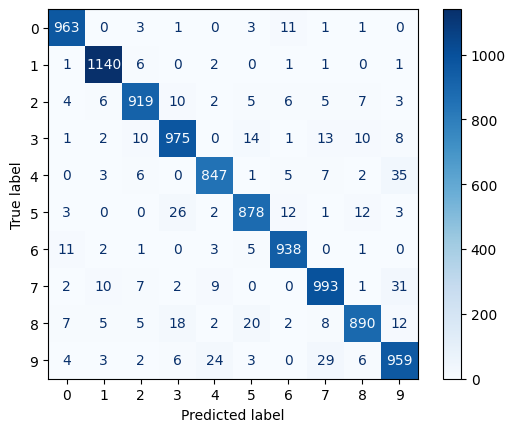

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

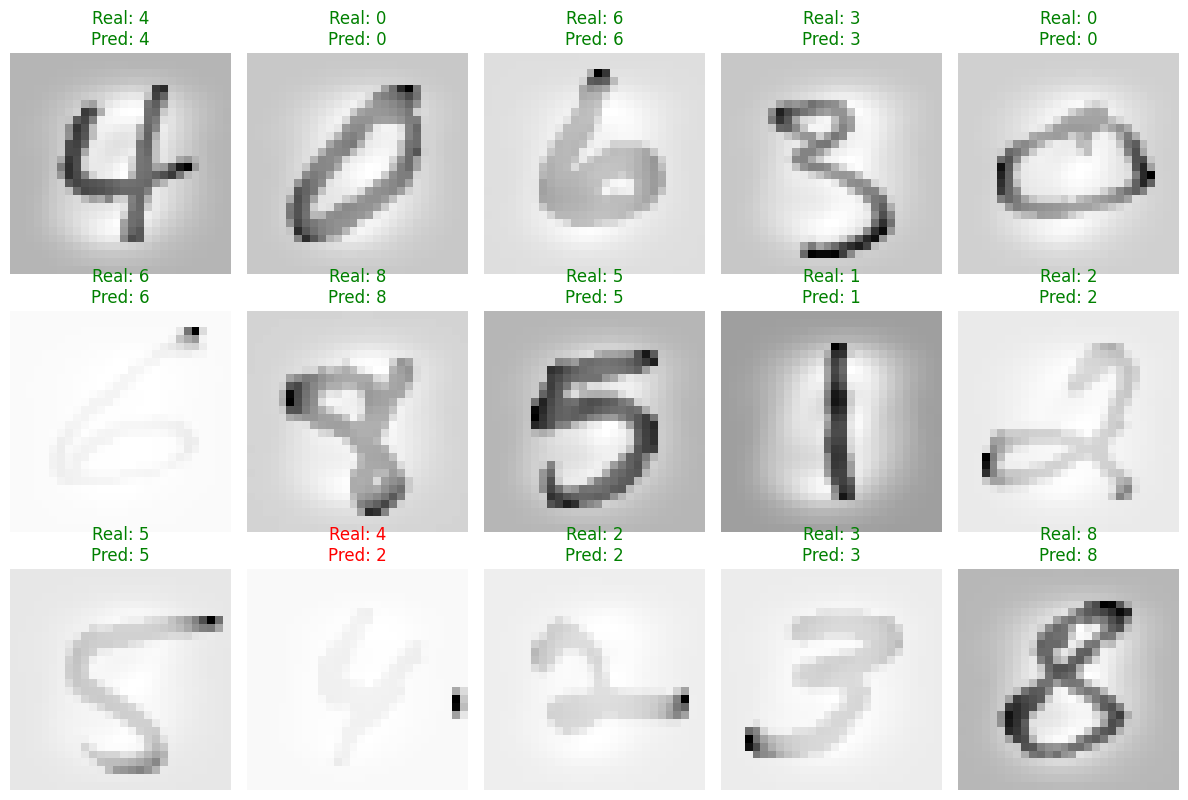

In [ ]:
# Plota imagens da classificação
indices = np.random.choice(len(X_test), size=15, replace=False)
sample_images = X_test[indices]
sample_true_labels = y_test[indices]
# if is_pca:
#     sample_pred_labels = knn.predict(X_test_pca[indices])
# else:
#     sample_pred_labels = knn.predict(X_test[indices])

sample_pred_labels = knn.predict(X_test_pca[indices])
plot_predictions(sample_images, sample_true_labels, sample_pred_labels)